#Malicious URL Classification Using Machine Learning

Practice Module: Pattern Recognition Systems (PRS)
Group: 18
Members:
Lim Jun Ming, A0231523U

Mediana, A0231458E

Yeong Wee Ping, A0231533R

# NOTES

```
Reference codes:
https://www.kaggle.com/siddharthkumar25/detect-malicious-url-using-ml
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7648114/

Malicious_n_Non-Malicious URL Datasets
https://www.kaggle.com/antonyj453/urldataset/
https://www.kaggle.com/sid321axn/malicious-urls-dataset
    url,label

Phishing Site URLs 
https://www.kaggle.com/taruntiwarihp/phishing-site-urls/code


# Load python packages and dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tld
!pip install tldextract -q
!pip install scikit-learn==1.0
!pip install scikit-plot

In [ ]:
import sys
import os
import scipy
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import *
import scikitplot as skplt

import tldextract
from urllib.parse import urlparse,urlsplit

import sklearn as sk
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, roc_curve, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import joblib

from nltk.tokenize import RegexpTokenizer  
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

print("Versions of key libraries")
print("-------------------------")
print("pandas:      ", pd.__version__)
print("numpy:       ", np.__version__)
print('sklearn:     ', sk.__version__)

os.chdir('/content/drive/MyDrive/iss/prs_proj')
print("Current working directory:")
os.getcwd()

Versions of key libraries
-------------------------
pandas:       1.1.5
numpy:        1.19.5
sklearn:      1.0
Current working directory:


'/content/drive/MyDrive/iss/prs_proj'

In [ ]:
!ls

flowchart	 MalURLmodels23pjoblib	       PhishFile.csv
MalFile.csv	 MalURLmodels23pjoblib_sk1     phishingURL
maliciousURL	 MalURLmodels23p_MinMaxScaler  Scalermodels
MalURLmodels23p  MalURLmodels30p	       Scalermodels_sk1


## building the machine learning classifier




```
building the machine learning classifier
https://www.kaggle.com/siddharthkumar25/detect-malicious-url-using-ml
    url, label
Data Preprocessing / Feature Engineering
    Length Features
    Length Of Url
    Length of Hostname
    Length Of Path
    Length Of First Directory
    Length Of Top Level Domain

Count Features
    Count Of '-'
    Count Of '@'
    Count Of '?'
    Count Of '%'
    Count Of '.'
    Count Of '='
    Count Of 'http'
    Count Of 'www'
    Count Of Digits
    Count Of Letters
    Count Of Number Of Directories

Binary Features
    Use of IP or not
    Use of Shortening URL or not
Apart from the lexical features, we will use TFID - Term Frequency Inverse Document as well.


Data Visualization
Building Machine Learning Models using Lexical Features.
Building Machine Learning Models using Lexical Features and Tokenization. (Will Update this part)

https://www.kaggle.com/kawiswara/malicious-web-detection-with-1d-cnn
```



## Load data and Data Preprocessing

In [ ]:
pdMalicious = pd.read_csv("/content/drive/MyDrive/iss/prs_proj/maliciousURL/Malicious_data.csv")
pdPhishing = pd.read_csv("/content/drive/MyDrive/iss/prs_proj/phishingURL/phishing_site_urls.csv")

print("Malicious Dataset:")
print("Shape: ",pdMalicious.shape)
print("Null: \n",pdMalicious.isnull().sum())
print(pdMalicious.describe())
#print(pdMalicious.info())

print("\nPhishing Dataset:")
print("Shape: ",pdPhishing.shape)
print("Null: \n",pdPhishing.isnull().sum())
print(pdPhishing.describe())
#print(pdPhishing.info())

Malicious Dataset:
Shape:  (451774, 2)
Null: 
 url      0
label    0
dtype: int64
                                                      url   label
count                                              451774  451774
unique                                             433682       2
top     http://style.org.hc360.com/css/detail/mysite/s...    good
freq                                                  180  344821

Phishing Dataset:
Shape:  (549846, 2)
Null: 
 url      0
label    0
dtype: int64
                                  url   label
count                          549846  549846
unique                         507695       2
top     jhomitevd2abj3fk.tor2web.org/    good
freq                               52  392924


label
bad     106953
good    344821
dtype: int64


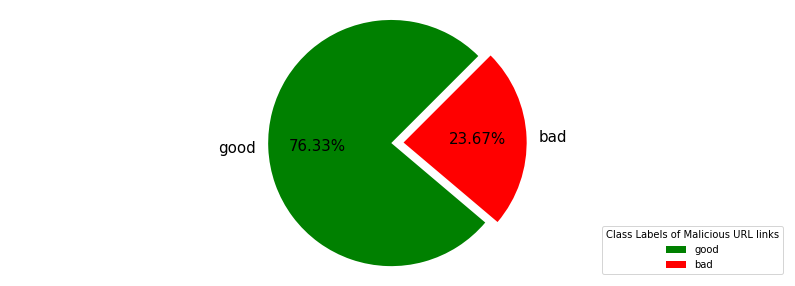

In [ ]:
# Class Distribution of Labels
print(pdMalicious.groupby('label').size())

# Pie Chart of Malicious and Benign Webpages Distribution
labels = pdMalicious['label'].value_counts()
w = (list(labels.index), list(labels.values))

fig = plt.figure(figsize = (14,5))
Explode = [0,0.1]
plt.pie(w[1],explode=Explode,labels=w[0],shadow=False,startangle=45,
        colors=['green','red'],autopct='%.2f%%',textprops={'fontsize': 15})
plt.axis('equal')
plt.legend(title='Class Labels of Malicious URL links',loc='lower right')
#fig.savefig('imgs/Fig03:Pie Chart Distribution of Malicious URL Class Labels.png')
plt.show()

label
bad     156922
good    392924
dtype: int64


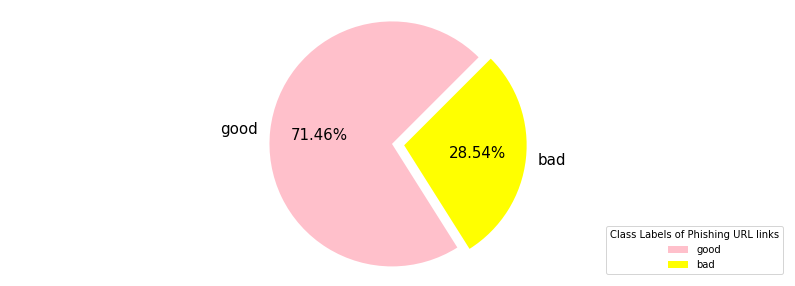

In [ ]:
# Class Distribution of Labels
print(pdPhishing.groupby('label').size())

# Pie Chart of Malicious and Benign Webpages Distribution
labels = pdPhishing['label'].value_counts()
w = (list(labels.index), list(labels.values))

fig = plt.figure(figsize = (14,5))
Explode = [0,0.1]
plt.pie(w[1],explode=Explode,labels=w[0],shadow=False,startangle=45,
        colors=['pink','yellow'],autopct='%.2f%%',textprops={'fontsize': 15})
plt.axis('equal')
plt.legend(title='Class Labels of Phishing URL links',loc='lower right')
#fig.savefig('imgs/Fig03:Pie Chart Distribution of Phishing URL Class Labels.png')
plt.show()

# Data Processing (Malicious URL dataset)
1. Parse URL (urlparse) into scheme, netloc, path, params, query, fragment
2. Parse URL (tldextract) the domain, subdomain, and suffix
3. Remove corrupted data based on the netloc values
4. Feature Extraction:
URL Length, Hostname/Netloc(netloc_length), path_length, fd_length, suffix_length, num_subdomains{from netloc}, count_dir, path_fs_., domain_, url_, path_, domain-, url-, path-, count@, count?, count%, count., count=, count-https_inpath, count-http_inpath, count-www_inpath, count-digits, count-letters

In [ ]:
# # test out get_tld function
# print(get_tld("http://www.blahbalh.edu.com.sg"))
# print(get_tld("//blahbalh.edu.com.sg",fail_silently=True)) # need // for get_tld to work

In [ ]:
''' urlparse
Parse a URL into 6 components:
    <scheme>://<netloc>/<path>;<params>?<query>#<fragment>
    Return a 6-tuple: (scheme, netloc, path, params, query, fragment).
'''    
def parse_url(url: str) -> Optional[Dict[str, str]]:
    try:
        no_scheme = not url.startswith('https://') and not url.startswith('http://')
        if no_scheme:
            parsed_url = urlparse(f"http://{url}")
            return {
                "scheme": None, # not established a value for this
                "netloc": parsed_url.netloc,
                "path": parsed_url.path,
                "params": parsed_url.params,
                "query": parsed_url.query,
                "fragment": parsed_url.fragment,
            }
        else:
            parsed_url = urlparse(url)
            return {
                "scheme": parsed_url.scheme,
                "netloc": parsed_url.netloc,
                "path": parsed_url.path,
                "params": parsed_url.params,
                "query": parsed_url.query,
                "fragment": parsed_url.fragment,
            }
    except:
        return None
def tldExtract(url) -> Optional[Dict[str, str]]:
    # extract subdomain, domain, and domain suffix from url
    # if item == '', fill with '<empty>'
    subdomain, domain, domain_suffix = (None if extracted == '' else extracted for extracted in tldextract.extract(url))
    return {"subdomain": subdomain, "domain": domain, "suffix": domain_suffix}

In [ ]:
pdMalicious["parsed_url"] = pdMalicious.url.apply(parse_url)
pdMalicious["tldextract"] = pdMalicious.url.apply(tldExtract)

pdMalicious = pd.concat([pdMalicious.drop(['parsed_url'], axis=1), pdMalicious['parsed_url'].apply(pd.Series)], axis=1) # 4min run
pdMalicious = pd.concat([pdMalicious.drop(['tldextract'], axis=1), pdMalicious['tldextract'].apply(pd.Series)], axis=1) # 2min run
pdMalicious.head()

,url,label,scheme,netloc,path,params,query,fragment,subdomain,domain,suffix
0,//diaryofagameaddict.com,bad,None,,//diaryofagameaddict.com,,,,None,diaryofagameaddict,com
1,//espdesign.com.au,bad,None,,//espdesign.com.au,,,,None,espdesign,com.au
2,//iamagameaddict.com,bad,None,,//iamagameaddict.com,,,,None,iamagameaddict,com
3,//kalantzis.net,bad,None,,//kalantzis.net,,,,None,kalantzis,net
4,//slightlyoffcenter.net,bad,None,,//slightlyoffcenter.net,,,,None,slightlyoffcenter,net


In [ ]:
#Check for corrupted Data
print(pdMalicious.netloc.isnull().sum())
for idx, i in enumerate(pdMalicious.netloc.values):
    if type(i) is not str:
        print(idx, pdMalicious.url.values[idx],pdMalicious.label.values[idx])
pdMalicious.shape

0


(451774, 11)

In [ ]:
#remove null_netloc
pdMalicious=pdMalicious[~pdMalicious.netloc.isnull()].reset_index()
pdMalicious=pdMalicious.drop("index", axis=1)
print(pdMalicious.shape)

#URL Length, Hostname Length, PathLength
pdMalicious['tot_url_length'] = pdMalicious['url'].apply(lambda i: len((i)))
pdMalicious['netloc_length'] =  pdMalicious['netloc'].apply(lambda i: len((i)))
pdMalicious['path_length'] = pdMalicious['path'].apply(lambda i: len((i)))

# #First Directory Length
def fd_length(url_path):
    try:
        return len(url_path.split('/')[1])
    except:
        return 0

pdMalicious['fd_length'] = pdMalicious['path'].apply(lambda i: fd_length(i))
pdMalicious['suffix_length'] = pdMalicious['suffix'].apply(lambda i: len(str(i)))

def get_num_subdomains(netloc: str) -> int:
    subdomain = tldextract.extract(netloc).subdomain 
    if subdomain == "":
        return 0
    return subdomain.count('.') + 1

pdMalicious['num_subdomains'] = pdMalicious['netloc'].apply(lambda i: get_num_subdomains(i))

#CountFeatures
pdMalicious['domain-'] = pdMalicious['netloc'].apply(lambda i: i.count('-'))
pdMalicious['url-'] = pdMalicious['url'].apply(lambda i: i.count('-'))
pdMalicious['path-'] = pdMalicious['path'].apply(lambda i: i.count('-'))

pdMalicious['domain_'] = pdMalicious['netloc'].apply(lambda i: i.count('_'))
pdMalicious['url_'] = pdMalicious['url'].apply(lambda i: i.count('_'))
pdMalicious['path_'] = pdMalicious['path'].apply(lambda i: i.count('_'))

pdMalicious['count_dir'] = pdMalicious['path'].str.count('/')

pdMalicious['path_fs_.'] = pdMalicious['path'].apply(lambda i: i.count('.')) #malicious.com/paypal.com


pdMalicious['count@'] = pdMalicious['url'].apply(lambda i: i.count('@'))
pdMalicious['count?'] = pdMalicious['url'].apply(lambda i: i.count('?'))
pdMalicious['count%'] = pdMalicious['url'].apply(lambda i: i.count('%'))
pdMalicious['count.'] = pdMalicious['url'].apply(lambda i: i.count('.'))
pdMalicious['count='] = pdMalicious['url'].apply(lambda i: i.count('='))

pdMalicious['count-http_inpath'] = pdMalicious['path'].apply(lambda i : i.count('http'))
pdMalicious['count-https_inpath'] = pdMalicious['path'].apply(lambda i : i.count('https'))
pdMalicious['count-www_inpath'] = pdMalicious['path'].apply(lambda i: i.count('www'))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

pdMalicious['count-digits']= pdMalicious['url'].apply(lambda i: digit_count(i))
pdMalicious['count-letters']= pdMalicious['url'].apply(lambda i: letter_count(i))

(451774, 11)


In [ ]:
colList=pdMalicious.columns

for i in colList:
    print(i, " - Null: ", pdMalicious[str(i)].isnull().sum())

url  - Null:  0
label  - Null:  0
scheme  - Null:  420464
netloc  - Null:  0
path  - Null:  0
params  - Null:  0
query  - Null:  0
fragment  - Null:  0
subdomain  - Null:  343520
domain  - Null:  14
suffix  - Null:  16195
tot_url_length  - Null:  0
netloc_length  - Null:  0
path_length  - Null:  0
fd_length  - Null:  0
suffix_length  - Null:  0
num_subdomains  - Null:  0
domain-  - Null:  0
url-  - Null:  0
path-  - Null:  0
domain_  - Null:  0
url_  - Null:  0
path_  - Null:  0
count_dir  - Null:  0
path_fs_.  - Null:  0
count@  - Null:  0
count?  - Null:  0
count%  - Null:  0
count.  - Null:  0
count=  - Null:  0
count-http_inpath  - Null:  0
count-https_inpath  - Null:  0
count-www_inpath  - Null:  0
count-digits  - Null:  0
count-letters  - Null:  0


In [ ]:
pdMalicious.to_csv('MalFile.csv', index=False)
pdMalicious.head(10)

,url,label,scheme,netloc,path,params,query,fragment,subdomain,domain,suffix,tot_url_length,netloc_length,path_length,fd_length,suffix_length,num_subdomains,domain-,url-,path-,domain_,url_,path_,count_dir,path_fs_.,count@,count?,count%,count.,count=,count-http_inpath,count-https_inpath,count-www_inpath,count-digits,count-letters
0,//diaryofagameaddict.com,bad,None,,//diaryofagameaddict.com,,,,None,diaryofagameaddict,com,24,0,24,0,3,0,0,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,21
1,//espdesign.com.au,bad,None,,//espdesign.com.au,,,,None,espdesign,com.au,18,0,18,0,6,0,0,0,0,0,0,0,2,2,0,0,0,2,0,0,0,0,0,14
2,//iamagameaddict.com,bad,None,,//iamagameaddict.com,,,,None,iamagameaddict,com,20,0,20,0,3,0,0,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,17
3,//kalantzis.net,bad,None,,//kalantzis.net,,,,None,kalantzis,net,15,0,15,0,3,0,0,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,12
4,//slightlyoffcenter.net,bad,None,,//slightlyoffcenter.net,,,,None,slightlyoffcenter,net,23,0,23,0,3,0,0,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,20
5,//toddscarwash.com,bad,None,,//toddscarwash.com,,,,None,toddscarwash,com,18,0,18,0,3,0,0,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,15
6,//tubemoviez.com,bad,None,,//tubemoviez.com,,,,None,tubemoviez,com,16,0,16,0,3,0,0,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,13
7,//ipl.hk,bad,None,,//ipl.hk,,,,None,ipl,hk,8,0,8,0,2,0,0,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,5
8,//crackspider.us/toolbar/install.php?pack=exe,bad,None,,//crackspider.us/toolbar/install.php,,pack=exe,,None,crackspider,us,45,0,36,0,2,0,0,0,0,0,0,0,4,2,0,1,0,2,1,0,0,0,0,37
9,//pos-kupang.com/,bad,None,,//pos-kupang.com/,,,,None,pos-kupang,com,17,0,17,0,3,0,0,1,1,0,0,0,3,1,0,0,0,1,0,0,0,0,0,12


# Data visulisation

NameError: ignored

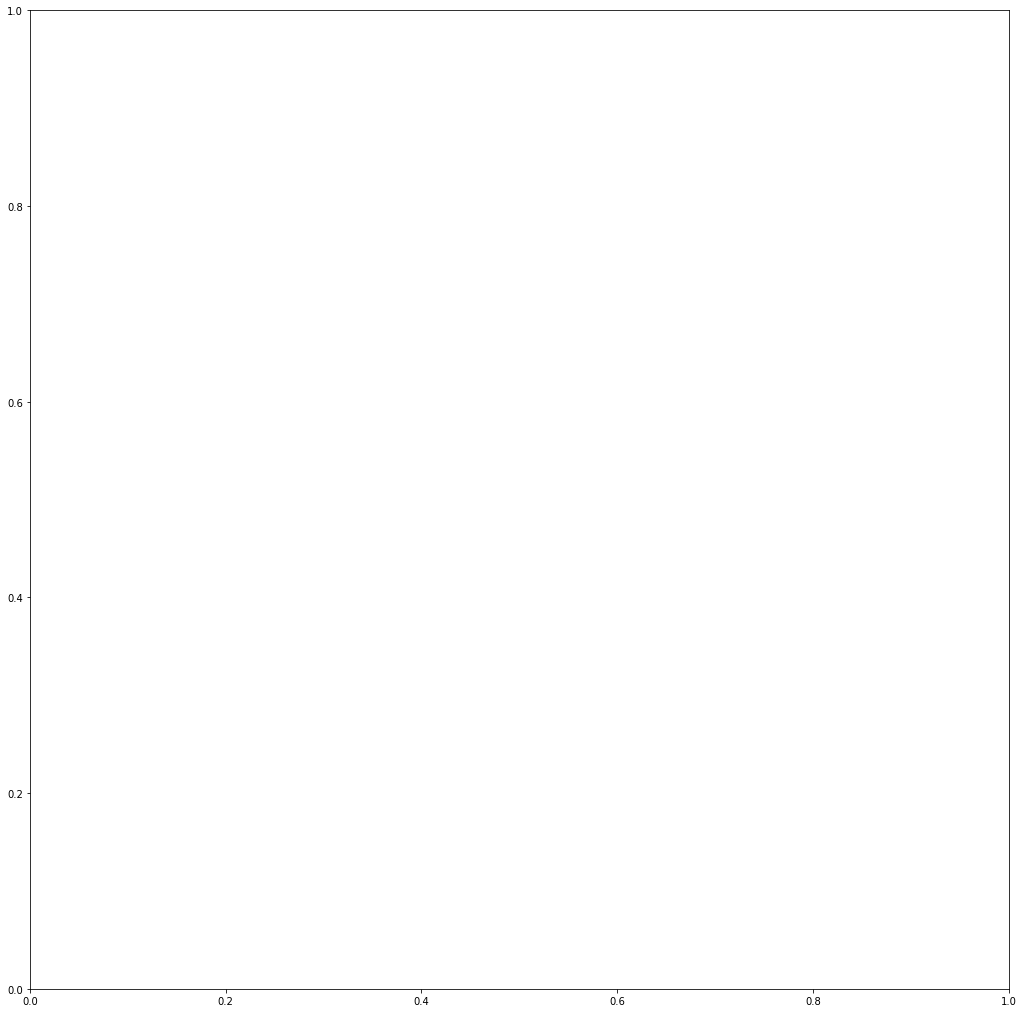

In [ ]:
#Heatmap

# corrmat = pdMalicious.corr()
# f, ax = plt.subplots(figsize=(25,19))
# sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

# plt.figure(figsize=(15,5))
# sns.countplot(x='label',data=pdMalicious)
# plt.title("Count Of URLs",fontsize=20)
# plt.xlabel("Type Of URLs",fontsize=18)
# plt.ylabel("Number Of URLs",fontsize=18)

# print("Percent Of Malicious URLs:{:.2f} %".format(len(pdMalicious[pdMalicious['label']=='bad'])/len(pdMalicious['label'])*100))
# print("Percent Of Benign URLs:{:.2f} %".format(len(pdMalicious[pdMalicious['label']=='good'])/len(pdMalicious['label'])*100))

# plt.figure(figsize=(20,5))
# plt.hist(pdMalicious['url_length'],bins=50,color='LightBlue')
# plt.title("URL-Length",fontsize=20)
# plt.xlabel("Url-Length",fontsize=18)
# plt.ylabel("Number Of Urls",fontsize=18)
# plt.ylim(0,1000)

# plt.figure(figsize=(20,5))
# plt.hist(pdMalicious['hostname_length'],bins=50,color='Lightgreen')
# plt.title("Hostname-Length",fontsize=20)
# plt.xlabel("Length Of Hostname",fontsize=18)
# plt.ylabel("Number Of Urls",fontsize=18)
# plt.ylim(0,1000)

# plt.figure(figsize=(20,5))
# plt.hist(pdMalicious['tld_length'],bins=50,color='Lightgreen')
# plt.title("TLD-Length",fontsize=20)
# plt.xlabel("Length Of TLD",fontsize=18)
# plt.ylabel("Number Of Urls",fontsize=18)
# plt.ylim(0,1000)

# plt.figure(figsize=(15,5))
# plt.title("Number Of Directories In Url",fontsize=20)
# sns.countplot(x='count_dir',data=pdMalicious)
# plt.xlabel("Number Of Directories",fontsize=18)
# plt.ylabel("Number Of URLs",fontsize=18)

# plt.figure(figsize=(15,5))
# plt.title("Use Of IP In Url",fontsize=20)
# plt.xlabel("Use Of IP",fontsize=18)
# sns.countplot(pdMalicious['use_of_ip'])
# plt.ylabel("Number of URLs",fontsize=18)

# plt.figure(figsize=(15,5))
# plt.title("Use Of IP In Url",fontsize=20)
# plt.xlabel("Use Of IP",fontsize=18)
# plt.ylabel("Number of URLs",fontsize=18)
# sns.countplot(pdMalicious['use_of_ip'],hue='label',data=pdMalicious)
# plt.ylabel("Number of URLs",fontsize=18)

# plt.figure(figsize=(15,5))
# plt.title("Use Of http In Url",fontsize=20)
# plt.xlabel("Use Of IP",fontsize=18)
# plt.ylim((0,1000))
# sns.countplot(pdMalicious['count-http'])
# plt.ylabel("Number of URLs",fontsize=18)

# plt.figure(figsize=(15,5))
# plt.title("Use Of http In Url",fontsize=20)
# plt.xlabel("Count Of http",fontsize=18)
# plt.ylabel("Number of URLs",fontsize=18)
# plt.ylim((0,1000))
# sns.countplot(pdMalicious['count-http'],hue='label',data=pdMalicious)
# plt.ylabel("Number of URLs",fontsize=18)

# plt.figure(figsize=(15,5))
# plt.title("Use Of WWW In URL",fontsize=20)
# plt.xlabel("Count Of WWW",fontsize=18)
# sns.countplot(pdMalicious['count-www'])
# plt.ylim(0,1000)
# plt.ylabel("Number Of URLs",fontsize=18)

# plt.figure(figsize=(15,5))
# plt.title("Use Of WWW In URL",fontsize=20)
# plt.xlabel("Count Of WWW",fontsize=18)

# sns.countplot(pdMalicious['count-www'],hue='label',data=pdMalicious)
# plt.ylim(0,1000)
# plt.ylabel("Number Of URLs",fontsize=18)



# Build Model using only Lexical Features

```
Three base models for classification.
1. Logistic Regression
2. Decision Trees
3. Random Forest

Added
4. Knn
5. AdaBoost
6. Naive Bayesian
```

In [ ]:
x = pdMalicious[['tot_url_length',
       'netloc_length', 'path_length', 'fd_length', 'suffix_length',
       'num_subdomains', 'domain-', 'url-', 'path-', 'url_',
       'path_', 'count_dir', 'path_fs_.', 'count@', 'count?', 'count%',
       'count.', 'count=', 'count-http_inpath', 'count-https_inpath',
       'count-www_inpath', 'count-digits', 'count-letters']]

le = LabelEncoder()
y=le.fit_transform(pdMalicious.label) #bad=0, good=1
# le.inverse_transform([0])

#Splitting the data into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=42)

scaler = StandardScaler()   # will give negative values which dont work on NB model, but performance for DT, RF, KNN and LogReg better by 0.1 to 0.2%
#scaler = MinMaxScaler()
scaler.fit(x_train)

pathfolder='/content/drive/MyDrive/iss/prs_proj/Scalermodels_sk1/'
joblib.dump(scaler, pathfolder+"Scaler23.jlib", compress=3)  # save StandardScaler module for new dataset, level 3 for balance on size and speed of r/w

x_train_scale = scaler.transform(x_train)  
x_test_scale = scaler.transform(x_test)  

print("x_train Neg values: \n", (x_train<0).sum())
print("x_train_scale Neg Values: ",(x_train_scale<0).sum())
print("x_train:", x_train)
print("x_train_Scale:", x_train_scale)
# print("\n")
# print(x_train_scale)
# print("\n")
# print(x_test_scale)

import pickle
# save the model to disk
def saveModel(model, modelname):
    pathfolder='/content/drive/MyDrive/iss/prs_proj/MalURLmodels23pjoblib_sk1/'
    #pickle.dump(model, open(pathfolder+modelname+".pkl", 'wb'))
    joblib.dump(model, pathfolder+modelname+".jlib", compress=3)  # level 3 for balance on size and speed of r/w

def perfResult(x_train, x_test, y_train, y_test, model):
    model.fit(x_train, y_train)
    tr_predict = model.predict(x_train)
    ts_predict = model.predict(x_test)
    tr_accuracy = accuracy_score(y_train, tr_predict)
    ts_accuracy = accuracy_score(y_test, ts_predict)
    ts_f1 = f1_score(y_test, ts_predict)
    modelName = str(model).split("(")[0]
    print(modelName)
    print(f"Train Accuracy Score: {tr_accuracy}")
    print(f"Test Accuracy Score: {ts_accuracy}")
    print(f"f1_score (1=good): {ts_f1}\n")
    print(confusion_matrix(y_test,ts_predict))
    print(classification_report(y_test,ts_predict))
    saveModel(model, modelName)
    return [tr_predict, ts_predict, tr_accuracy, ts_accuracy, ts_f1]
    
#plotting ROC Chart
def plotROC(x_train, x_test, y_train, y_test, model):
    y_pred_prob = model.predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    modelName = str(model).split("(")[0]
    plt.title(modelName + " ROC")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.plot(fpr,tpr,label=modelName+ ", roc_auc="+str(auc)[:5])
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc=4)
    plt.show()
    return (y_pred_prob, fpr, tpr, auc)

x_train Neg values: 
 tot_url_length        0
netloc_length         0
path_length           0
fd_length             0
suffix_length         0
num_subdomains        0
domain-               0
url-                  0
path-                 0
url_                  0
path_                 0
count_dir             0
path_fs_.             0
count@                0
count?                0
count%                0
count.                0
count=                0
count-http_inpath     0
count-https_inpath    0
count-www_inpath      0
count-digits          0
count-letters         0
dtype: int64
x_train_scale Neg Values:  2531171
x_train:         tot_url_length  netloc_length  ...  count-digits  count-letters
401609              18              0  ...             0             13
163013              80              0  ...             0             66
253854              62              0  ...             0             51
228050              52              0  ...             2             40
151656   

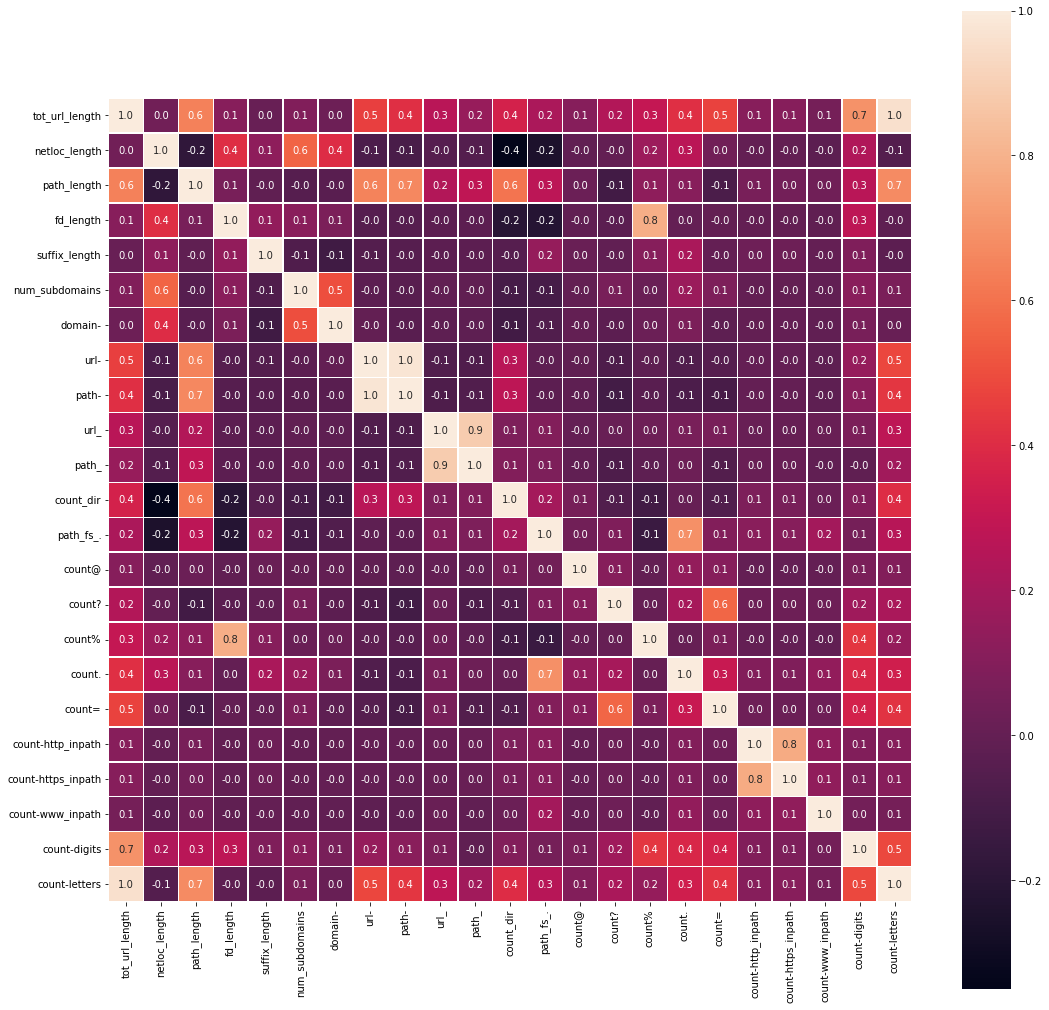

In [ ]:
# feature selection
f = plt.figure(figsize=(18, 18))
ax = plt.subplot(aspect='equal')
corplot = sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
categorical_feature_columns = list(set(x.columns)-set(x._get_numeric_data().columns))
print(categorical_feature_columns)
numerical_feature_columns = list(x._get_numeric_data().columns)
print(numerical_feature_columns)

[]
['tot_url_length', 'netloc_length', 'path_length', 'fd_length', 'suffix_length', 'num_subdomains', 'domain-', 'url-', 'path-', 'url_', 'path_', 'count_dir', 'path_fs_.', 'count@', 'count?', 'count%', 'count.', 'count=', 'count-http_inpath', 'count-https_inpath', 'count-www_inpath', 'count-digits', 'count-letters']


In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
def gridSearchCV(x_train, x_test, y_train, y_test, model, param, cv_value):
    model_cv=GridSearchCV(model, param, cv=cv_value)
    model_cv.fit(x_train, y_train)
    best_score = model_cv.best_score_
    best_params = model_cv.best_params_
    print("Best Score:" + str(best_score))
    print("Best Parameters: " + str(best_params))
    return (best_score, best_params)

In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn_tr_predict, knn_ts_predict, knn_tr_accuracy, knn_ts_accuracy, knn_f1_score= perfResult(x_train_scale, x_test_scale, y_train, y_test, knn) # n=3 took 35min
knn_y_pred_prob, knn_fpr, knn_tpr, knn_auc=plotROC(x_train_scale, x_test_scale, y_train, y_test, knn) # another 15min

In [ ]:
#Logistic Regression
log_model = LogisticRegression(C=1.5)
lr_tr_predict, lr_ts_predict, lr_tr_accuracy, lr_ts_accuracy, lr_f1_score = perfResult(x_train_scale, x_test_scale,  y_train, y_test, log_model)
lr_y_pred_prob, lr_fpr, lr_tpr, lr_auc = plotROC(x_train_scale, x_test_scale,  y_train, y_test, log_model)

In [ ]:
#perform GridSearchCV
param_grid = {'criterion':['gini', 'entropy'], 'max_depth':np.arange(2,10), 'min_samples_split':np.arange(2,100)}
dt_model = DecisionTreeClassifier()
best_score, best_params = gridSearchCV(x_train_scale, x_test_scale, y_train, y_test, dt_model, param_grid, cv_value=5)

Best Score:0.8898193688320515
Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 7}


DecisionTreeClassifier
Train Accuracy Score: 0.8920107428503969
Test Accuracy Score: 0.8892051024215633
f1_score (1=good): 0.9302407071893602

[[ 47588  27380]
 [  7658 233616]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.73     74968
           1       0.90      0.97      0.93    241274

    accuracy                           0.89    316242
   macro avg       0.88      0.80      0.83    316242
weighted avg       0.89      0.89      0.88    316242



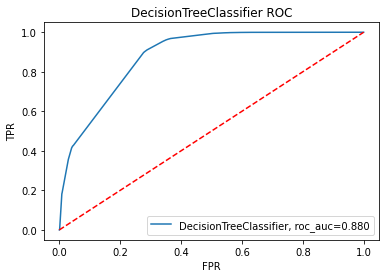

In [ ]:
#Decision Tree
#Manual Search
# def plotTRTS(xmin, xmax, step, train_scores, test_scores):
#     plt.figure(figsize=(12,5))
#     plt.plot(range(xmin, xmax, step),train_scores,marker='*',label='Train Score')
#     plt.plot(range(xmin, xmax, step),test_scores,marker='o',label='Test Score')

# train_scores=[]
# test_scores=[]

# #Adjust the decision tree parameters to improve the performance. Write your code below.
# best_para = {'max_depth':0, 'min_samples':0}
# best_test_acc = 0

dt_model = DecisionTreeClassifier(max_depth=9,min_samples_split=7)
dt_tr_predict, dt_ts_predict, dt_tr_accuracy, dt_ts_accuracy, dt_f1_score = perfResult(x_train_scale, x_test_scale, y_train, y_test, dt_model)
dt_y_pred_prob, dt_fpr, dt_tpr, dt_auc = plotROC(x_train_scale, x_test_scale, y_train, y_test, dt_model)

In [ ]:
# #perform GridSearchCV
# param_grid = {'criterion':['gini', 'entropy'], 'max_depth':np.arange(2,10), 'min_samples_split':np.arange(2,100)}
# rfc = RandomForestClassifier() 
# best_score, best_params = gridSearchCV(x_train_scale, x_test_scale, y_train, y_test, rfc, param_grid, cv_value=5) # 2h 45min

RandomForestClassifier
Train Accuracy Score: 0.952896732874893
Test Accuracy Score: 0.9191789831837643
f1_score (1=good): 0.9480532414135111

[[ 57451  17517]
 [  8042 233232]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82     74968
           1       0.93      0.97      0.95    241274

    accuracy                           0.92    316242
   macro avg       0.90      0.87      0.88    316242
weighted avg       0.92      0.92      0.92    316242



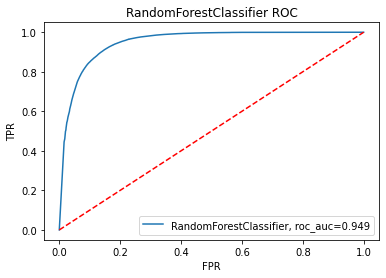

In [ ]:
#Random Forest
rfc = RandomForestClassifier() 
rf_tr_predict, rf_ts_predict, rf_tr_accuracy, rf_ts_accuracy, rf_f1_score = perfResult(x_train_scale, x_test_scale, y_train, y_test, rfc)
rf_y_pred_prob, rf_fpr, rf_tpr, rf_auc = plotROC(x_train_scale, x_test_scale, y_train, y_test, rfc)

AdaBoostClassifier
Train Accuracy Score: 0.8880043089454889
Test Accuracy Score: 0.8868777708210801
f1_score (1=good): 0.9286682777817656

[[ 47597  27371]
 [  8403 232871]]
              precision    recall  f1-score   support

           0       0.85      0.63      0.73     74968
           1       0.89      0.97      0.93    241274

    accuracy                           0.89    316242
   macro avg       0.87      0.80      0.83    316242
weighted avg       0.88      0.89      0.88    316242



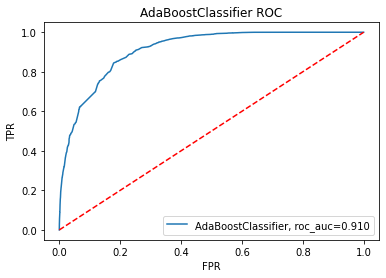

In [ ]:
#AdaBoost
# Create adaboost classifer object (default base_estimator is DecisionTreeClassifier initialized with max_depth=1)
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
adb_tr_predict, adb_ts_predict, adb_tr_accuracy, adb_ts_accuracy, adb_f1_score = perfResult(x_train_scale, x_test_scale, y_train, y_test, abc)
adb_y_pred_prob, adb_fpr, adb_tpr, adb_auc = plotROC(x_train_scale, x_test_scale, y_train, y_test, abc)

In [ ]:
#SVM
from sklearn.svm import SVC
svc = SVC()

#svc = svm.SVC()
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# clf = GridSearchCV(svc, parameters)
# clf.fit(x_train_scale, y_train)
# sorted(clf.cv_results_.keys())

gamma1, gamma2 = 0.1, 1
C1, C2 = 1, 10
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)
svm_clfs = []
for gamma, C in hyperparams:
    svm_clf=SVC(kernel="rbf",gamma=gamma, C=C) 
    svm_clf.fit(x_train_scale,y_train)   # long run time > 1.5hr
    svm_clfs.append(svm_clf)

import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix  

for i, svm_clf in enumerate(svm_clfs):
    predictions = svm_clf.predict(x_test_scale)  
    gamma, C = hyperparams[i]  # total runtime 2h 19min
    print("r=", gamma, "C=", C)
    print("Accuracy=", metrics.accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test,predictions))  
    print(classification_report(y_test,predictions))  

r= 0.1 C= 1
Accuracy= 0.9015658894138033
[[ 49720  25248]
 [  5881 235393]]
              precision    recall  f1-score   support

           0       0.89      0.66      0.76     74968
           1       0.90      0.98      0.94    241274

    accuracy                           0.90    316242
   macro avg       0.90      0.82      0.85    316242
weighted avg       0.90      0.90      0.90    316242

r= 0.1 C= 10
Accuracy= 0.9083328590130343
[[ 51595  23373]
 [  5616 235658]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78     74968
           1       0.91      0.98      0.94    241274

    accuracy                           0.91    316242
   macro avg       0.91      0.83      0.86    316242
weighted avg       0.91      0.91      0.90    316242

r= 1 C= 1
Accuracy= 0.9168453273126277
[[ 55710  19258]
 [  7039 234235]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81     74968
          

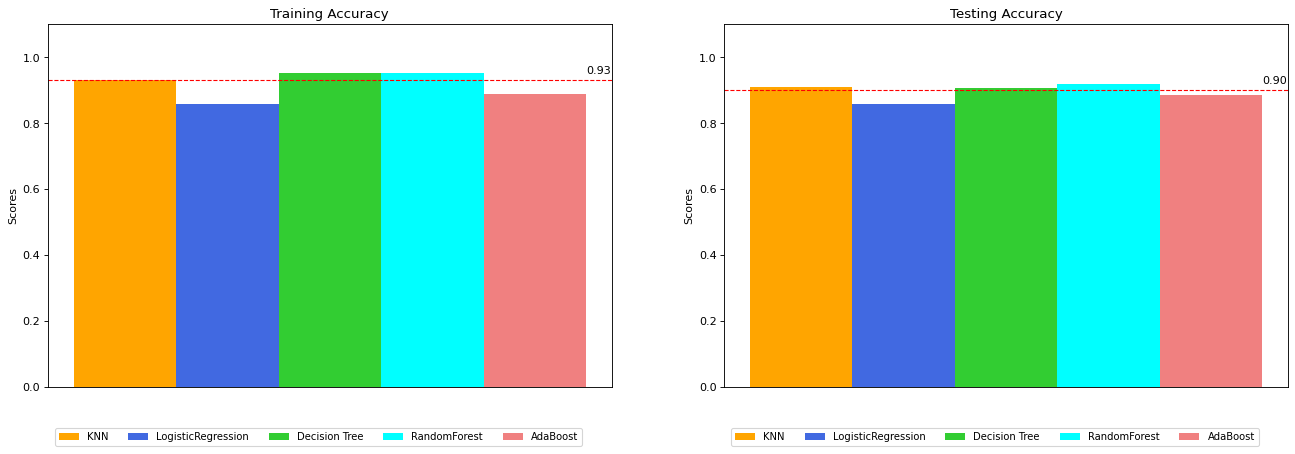

--------------------------------------------------------------------------------------------------------------------------------------------------------



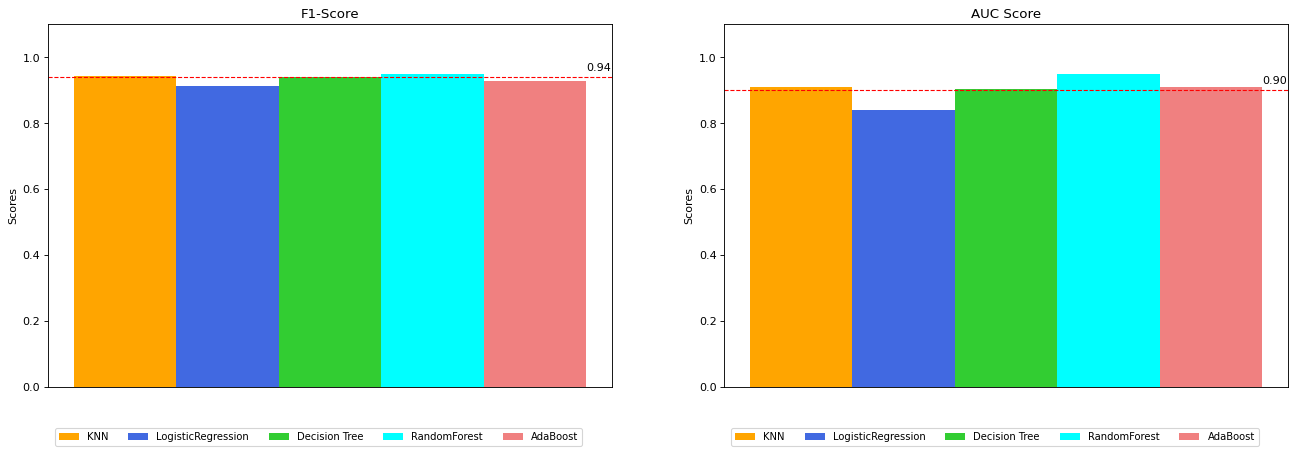

In [ ]:
# Plotting Bar Chart for comparision
model_labels = ['KNN', 'LogisticRegression', 'Decision Tree', 'RandomForest', 'AdaBoost']
width = 0.1

plt.figure(figsize=(20,6),dpi=80)
# Plot Training Accuracy Comparison
plt.subplot(121)
plt.bar(z-0.2, knn_tr_accuracy, width, color='orange')
plt.bar(z-0.1, lr_tr_accuracy, width, color='royalblue')
plt.bar(z, dt_tr_accuracy, width, color='limegreen')
plt.bar(z+0.1, rf_tr_accuracy, width, color='aqua')
plt.bar(z+0.2, adb_tr_accuracy, width, color='lightcoral')
plt.ylim(0,1.1)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
#plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(model_labels, loc='upper center', bbox_to_anchor=(0.48, -0.1), ncol=6, prop={'size': 9})
plt.axhline(y=0.93, color='r', linestyle='--', linewidth=1)
plt.text(0.25,0.95,'0.93')
plt.title('Training Accuracy')

# Plot Testing Accuracy Comparison
plt.subplot(122)
plt.bar(z-0.2, knn_ts_accuracy, width, color='orange')
plt.bar(z-0.1, lr_ts_accuracy, width, color='royalblue')
plt.bar(z, dt_ts_accuracy, width, color='limegreen')
plt.bar(z+0.1, rf_ts_accuracy, width, color='aqua')
plt.bar(z+0.2, adb_ts_accuracy, width, color='lightcoral')
plt.ylim(0,1.1)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
#plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(model_labels, loc='upper center', bbox_to_anchor=(0.48, -0.1), ncol=6, prop={'size': 9})
plt.axhline(y=0.9, color='r', linestyle='--', linewidth=1)
plt.text(0.25,0.92,'0.90')
plt.title('Testing Accuracy')

plt.show()
print('--------------------------------------------------------------------------------------------------------------------------------------------------------\n')

plt.figure(figsize=(20,6),dpi=80)
# Plot f1 Score Comparison
plt.subplot(121)
plt.bar(z-0.2, knn_f1_score, width, color='orange')
plt.bar(z-0.1, lr_f1_score, width, color='royalblue')
plt.bar(z, dt_f1_score, width, color='limegreen')
plt.bar(z+0.1, rf_f1_score, width, color='aqua')
plt.bar(z+0.2, adb_f1_score, width, color='lightcoral')
plt.ylim(0,1.1)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
#plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(model_labels, loc='upper center', bbox_to_anchor=(0.48, -0.1), ncol=6, prop={'size': 9})
plt.axhline(y=0.94, color='r', linestyle='--', linewidth=1)
plt.text(0.25,0.96,'0.94')
plt.title('F1-Score')

# Plot AUC Score Comparison
plt.subplot(122)
plt.bar(z-0.2, knn_auc, width, color='orange')
plt.bar(z-0.1, lr_auc, width, color='royalblue')
plt.bar(z, dt_auc, width, color='limegreen')
plt.bar(z+0.1, rf_auc, width, color='aqua')
plt.bar(z+0.2, adb_auc, width, color='lightcoral')
plt.ylim(0,1.1)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
#plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(model_labels, loc='upper center', bbox_to_anchor=(0.48, -0.1), ncol=6, prop={'size': 9})
plt.axhline(y=0.90, color='r', linestyle='--', linewidth=1)
plt.text(0.25,0.92,'0.90')
plt.title('AUC Score')

plt.show()


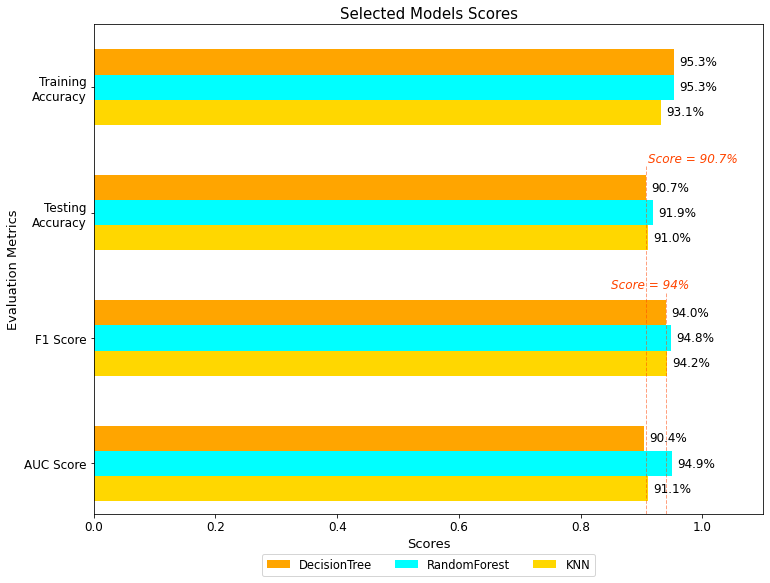

In [ ]:
# Selected Models for Deployment
sel_models = ['DecisionTree', 'RandomForest', 'KNN']
sel_metrics = ['Training\nAccuracy', 'Testing\nAccuracy', 'F1 Score', 'AUC Score'][::-1]

DT_eval = [dt_tr_accuracy, dt_ts_accuracy, dt_f1_score, dt_auc][::-1]
RF_eval = [rf_tr_accuracy, rf_ts_accuracy, rf_f1_score, rf_auc][::-1]
KNN_eval = [knn_tr_accuracy, knn_ts_accuracy, knn_f1_score, knn_auc][::-1]

width = 0.2
q = np.arange(len(DT_eval))

plt.figure(figsize=(12,9))
plt.barh(q+0.2, DT_eval, width, color='orange')
plt.barh(q, RF_eval, width, color='aqua')
plt.barh(q-0.2, KNN_eval, width, color='gold')

for i in np.arange(len(DT_eval)):
  plt.text(DT_eval[i]+0.04, i+0.15, str(round(DT_eval[i]*100,1))+'%', ha="center", va="bottom", fontsize=12)
  plt.text(RF_eval[i]+0.04, i-0.05, str(round(RF_eval[i]*100,1))+'%', ha="center", va="bottom", fontsize=12)
  plt.text(KNN_eval[i]+0.04, i-0.25, str(round(KNN_eval[i]*100,1))+'%', ha="center", va="bottom", fontsize=12)
plt.legend(sel_models, loc='upper center', bbox_to_anchor=(0.5, -0.07), ncol=6, prop={'size': 11.5})
plt.yticks(q, sel_metrics, fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(-0.4,3.5)
plt.xlim(0,1.1)

plt.vlines(x=0.94, ymin=-0.4, ymax=1.37, color='orangered', linestyle='--', linewidth=1, alpha=0.5)
plt.text(0.85,1.4,'Score = 94%', color='orangered', fontsize=12, style='italic')

plt.vlines(x=0.9, ymin=-0.4, ymax=2.37, color='orangered', linestyle='--', linewidth=1, alpha=0.5)
plt.text(0.91,2.4,'Score = 90.7%', color='orangered', fontsize=12, style='italic')

plt.xlabel('Scores', fontsize=13)
plt.ylabel('Evaluation Metrics', fontsize=13)
plt.title('Selected Models Scores', fontsize=15)

plt.show()